I really want to see how to implement a Convolutional Neural Network (CNN), test and train against the MNIST dataset, and see if its performance is better than my regular NN, particularly against my custom dataset. 

I'll be following the TensorFlow example provided here : https://www.tensorflow.org/tutorials/images/cnn

In [97]:
import tensorflow as tf
from tensorflow import keras

import random
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from tensorflow.keras import datasets, layers, models

In [62]:
# Loading up the good ol' MNIST dataset
mnist = datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Let's normalize all the images
train_images = train_images/255.
test_images = test_images/255.

# Splitting train into train and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [64]:
print(train_images.shape, test_images.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


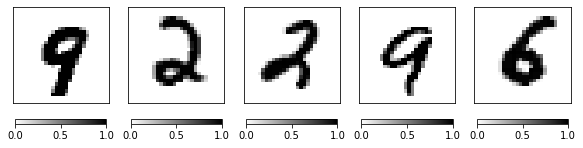

In [69]:
# Perform a sanity check, let's look at a few images
plt.figure(figsize=(10, 3))
for i in range(5):
    img = train_images[random.randint(0, len(train_images)), :, :, 0]
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap = 'binary')
    plt.subplots_adjust(hspace=1.2)
    plt.colorbar(orientation = 'horizontal', pad = 0.1, shrink = 0.95)
    plt.xticks([])
    plt.yticks([])

In [70]:
# Let's define our model

# I understand kernel sizes and activation functions, but am not completely sure what the maxpooling and conv
# layers actually do, and what the 'filter' parameter does in the input. We'll come back to this

model = models.Sequential() # We're going to put down layers sequentially
model.add(layers.Conv2D(28, (2, 2), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (2, 2), activation='relu'))

# Adding a few dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Because we're making predictions on 10 digits

In [71]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 27, 27, 28)        140       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 56)        6328      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 56)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 5, 5, 56)          12600     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 56)              

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(train_images, train_labels, epochs = 20, validation_data = (x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 265us/sample - loss: 0.1513 - accuracy: 0.9541 - val_loss: 0.0600 - val_accuracy: 0.9829
Epoch 2/20
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0375 - val_accuracy: 0.9881
Epoch 3/20
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0275 - val_accuracy: 0.9912
Epoch 4/20
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0188 - val_accuracy: 0.9937
Epoch 5/20
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0189 - val_accuracy: 0.9938
Epoch 6/20
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0103 - val_accuracy: 0.9972
Epoch 7/20
60000/60000 [====================

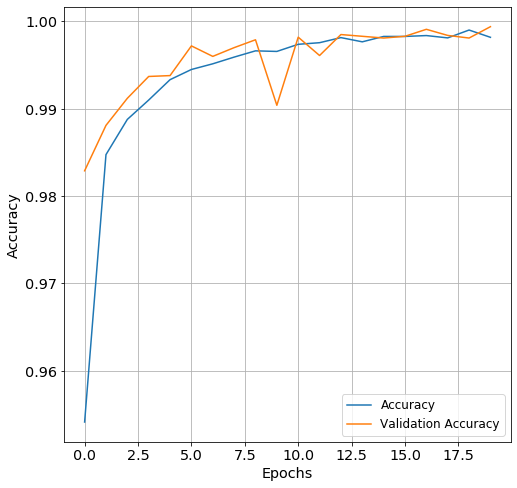

In [88]:
# Let's plot the evolution of the training history
plt.figure(figsize = (8, 8))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs', size='x-large')
plt.ylabel('Accuracy', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.legend(fontsize='large')
plt.grid()

In [89]:
# Let's check out the performance on the test set

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [91]:
print(test_loss, test_accuracy)

0.06238671317175988 0.9905


### Ok, looks good. Now for the _real_ test

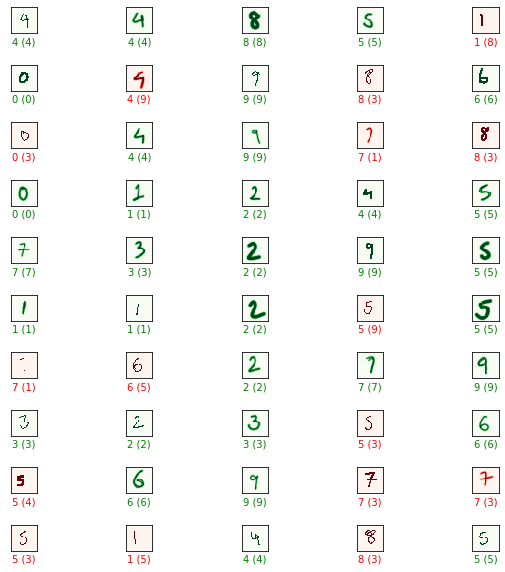

In [99]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    image = mpimg.imread(test_image)
    
    img = mpimg.imread(test_image)
#    img = 255*(1 - img[:, :, 0])
    img = (4 - np.sum(img, axis=2))
    img = img/np.max(img)    
 
    prediction = str(np.argmax(model.predict(img.reshape(1, 28, 28, 1))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [100]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  68.0 %


In [103]:
test = train_images.reshape(60000*28*28)

In [108]:
print(train_images.shape)

(60000, 28, 28, 1)


(array([38847859.,   571880.,   514157.,   438029.,   446644.,   518761.,
          454060.,   518723.,   611860.,  4118027.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

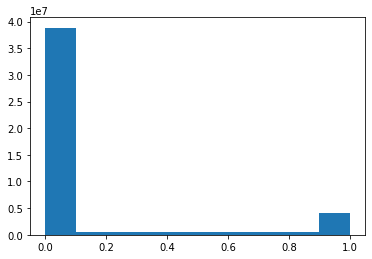

In [107]:
plt.hist(test)

In [113]:
test_images = glob.glob('./test_digits/*')
my_digits = np.zeros((len(test_images), 28, 28))
for i, image in enumerate(test_images):
    img = mpimg.imread(image)
    
    img = mpimg.imread(test_image)
#    img = 255*(1 - img[:, :, 0])
    img = (4 - np.sum(img, axis=2))
    img = img/np.max(img)
    
    my_digits[i, :, :] = img

(array([133534.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   6802.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

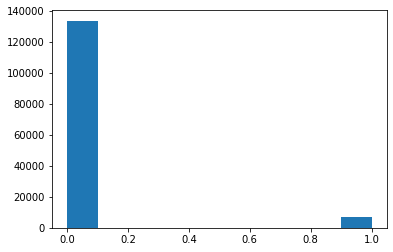

In [115]:
test2 = my_digits.reshape(len(test_images)*28*28)
plt.hist(test2)